In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import linear_model

In [2]:
epsilion = np.random.randn(10**4)
epsilion

array([-0.39850879,  0.77120707,  0.25031408, ..., -0.5930081 ,
       -0.67335046,  0.64467842])

In [3]:
v = np.random.uniform(0,1,10**4)

In [4]:
v

array([0.65669673, 0.17323648, 0.06044497, ..., 0.53416315, 0.90445558,
       0.38858715])

In [5]:
threshold = 0.017

In [6]:
v[v<=threshold] = np.log(0.65)
v[v!=np.log(0.65)] = 0

In [7]:
v

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
lng = 0.02+0.02*epsilion+v

In [9]:
lng

array([0.01202982, 0.03542414, 0.02500628, ..., 0.00813984, 0.00653299,
       0.03289357])

In [10]:
gama = np.arange(1,4.1,0.1)
gama

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. ])

In [11]:
np.exp(lng)

array([1.01210247, 1.03605905, 1.02532156, ..., 1.00817306, 1.00655438,
       1.03344054])

In [20]:
start = 1
end = 4.1
step = 0.1
for i in np.arange(start,end,step):
    m = 0.99*np.exp(lng)**-i

In [13]:
m

array([0.94348989, 0.85920572, 0.89576654, ..., 0.95828535, 0.96446446,
       0.86794701])

In [14]:
mean = np.mean(m)
mean

0.9950151239942208

In [15]:
#每一轮产生10000个数，然后对这10000个数求平均值和方差

In [21]:
result_df = pd.DataFrame(columns=["γ", "μM", "σM"])
start = 1
end = 4.1
step = 0.1
for i in np.arange(start,end,step):
    m = 0.99*np.exp(lng)**-i
    mean = np.mean(m)
    std = np.std(m)
    temp_df = pd.DataFrame({"γ": [i], "μM": [mean], "σM": [std]})
    result_df = pd.concat([result_df, temp_df], ignore_index=True)
result_df

C:\Users\dell\AppData\Local\Temp\ipykernel_9168\973299416.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, temp_df], ignore_index=True)


,γ,μM,σM
0,1.0,0.980177,0.073491
1,1.1,0.979468,0.082450
2,1.2,0.978815,0.091757
3,1.3,0.978222,0.101428
4,1.4,0.977689,0.111478
5,1.5,0.977220,0.121924
6,1.6,0.976816,0.132785
7,1.7,0.976480,0.144079
8,1.8,0.976215,0.155824
9,1.9,0.976023,0.168042


In [22]:
result_df["σM/μM"] = result_df["σM"]/result_df["μM"]
result_df

,γ,μM,σM,σM/μM
0,1.0,0.980177,0.073491,0.074977
1,1.1,0.979468,0.082450,0.084178
2,1.2,0.978815,0.091757,0.093743
3,1.3,0.978222,0.101428,0.103686
4,1.4,0.977689,0.111478,0.114022
5,1.5,0.977220,0.121924,0.124767
6,1.6,0.976816,0.132785,0.135937
7,1.7,0.976480,0.144079,0.147549
8,1.8,0.976215,0.155824,0.159621
9,1.9,0.976023,0.168042,0.172170


In [24]:
excel_file="123.xlsx"
result_df.to_excel(excel_file,index=False)

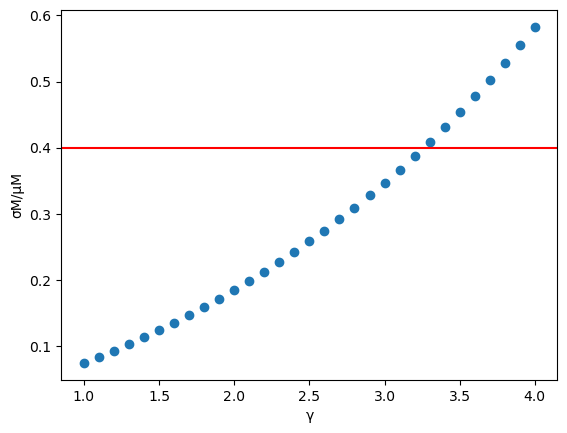

In [19]:
plt.scatter(gama,result_df["std/mean"])
plt.axhline(y=0.4,color="r")
plt.ylabel("σM/μM")
plt.xlabel("γ")
plt.show()